# Regression Predict | Skeleton

© Explore Data Science Academy

---
### Honour Code

I Sasha Nair, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The supply of electricity plays a large role in the livelihood of citizens in a country. Electricity, amongst other things, helps us stay connected, keep warm, and feed our families. Therefore there's a need to keep the lights on in order to maintain and improve the standard of living by investing in electricity infrastructure. However, in recent years, there has been evidence that the use of purely non-renewable sources is not sustainable.

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. We have been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.


## Spain Electricity Supply

The total consumption of 239.50 billion kWh of electric energy per year. Per capita this is an average of 5,061 kWh. Source: [worlddata](https://www.worlddata.info/europe/spain/energy-consumption.php)


Spain could provide itself completely with self-produced energy. The total production of all electric energy producing facilities is 259 bn kWh, which is 108% of the countries own usage. Despite this, Spain is trading energy with foreign countries. Along with pure consumptions the production, imports and exports play an important role. Other energy sources such as natural gas or crude oil are also used. In spite of this, Spain finds itself short of available electricity and ergo needs to plan for shortfalls as and when they occur. 

![title](infrastructure_spain.png)

 In 2021, wind energy was the main source of electricity in Spain with over 23 percent of the total electricity generation. Nuclear was the second source of electricity in the country with a share of 20.8 percent. Source: [Statista](https://www.statista.com/statistics/1230694/share-of-electricity-production-by-source-spain/)
 
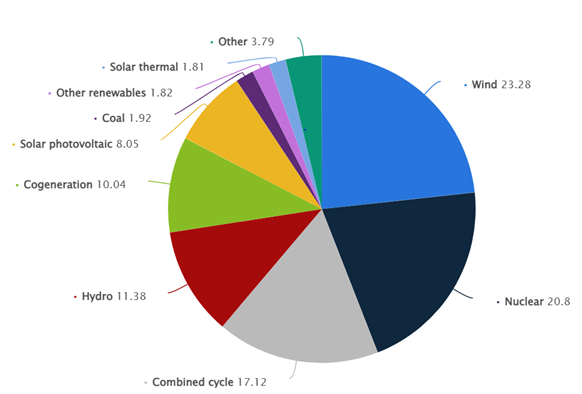

### Solution Approach

> In this project we are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. We endevour to clean the data, and find an optimal respresentation from within the features, such that we can forecast 3-hourly shortfalls. We believe this is a Regression-style problem, which will add high value to the Government of Spain. The model will be deployed on the cloud (using AWS infrastructure) and allow the Government to manage expectations of the population, and leverage and acquire resourced in advance of emmergencies due to our innovative modelling.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In this section we import, and briefly discuss, the libraries that will be used throughout analysis and modelling.


In [2]:
# importing packages to for us take advantage of open-source python libraries,
# and efficiently perform mathematical, statistical calculations as well as visualise, do EDA, etc.

# general packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualisation
import matplotlib.pyplot as plt # visualisation
import math
import random
from scipy import stats
import datetime as dt #formating data

# packages for modelling
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Setting global constants to ensure notebook results are reproducible
# this will be used when we use algorithms that involve any level of randomness 
PARAMETER_CONSTANT = 42

In [4]:
!pip install missingno

In [3]:
# you may need to install this seperately if you have not used if before: missingno
import missingno as msno

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

We load the data, and describe the processes used to ensure that our modelling process is robust, rigourous, and therefore good throughout our upcoming steps. We will be using two seperate files - a "test" file and a "train" file. The test file will be regarded as seperate for the entirity of this process, and all work, analysis and EDA will be based entirely on the Train data. This allows the Test file to be used as representative of totally unseen data. 

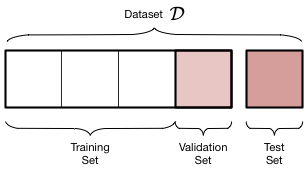

In [4]:
# load the data

df_sample = pd.read_csv('sample_submission_load_shortfall.csv')
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section we $EXPLORE$ the data we have available.

In [5]:
# high level data understanding 
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [6]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [7]:
df_train.shape

(8763, 49)

In [8]:
# Opps! We have an extra column... the index was accidentally imported. 
# Have to remove this column in order to conduct analysis further on.
df_train.drop(columns = ['Unnamed: 0'], inplace = True)
df_test.drop(columns = ['Unnamed: 0'], inplace = True)


In [9]:
df_test.shape

(2920, 47)

In [10]:
df_train.columns

Index(['time', 'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min'

In [11]:
#Lets sort this by region to get a better understanding of what we dealing with
#Re-ordering columns headings by accending order for easier interpretation
cols=df_train.columns.tolist()
cols.sort()
df_train=df_train[cols]
#What we do for train we must do for our test data
cols2=df_test.columns.tolist()
cols2.sort()
df_test=df_test[cols2]

In [12]:
#Checking for Nulls in the data
df_train.isnull().sum()[df_train.isnull().sum() != 0].sort_values(ascending=False) *100 / df_train.shape[0]

Valencia_pressure    23.599224
dtype: float64

In [13]:
#What we do for train we must do for our test data
df_test.isnull().sum()[df_test.isnull().sum() != 0].sort_values(ascending=False) *100 / df_test.shape[0]

Valencia_pressure    15.547945
dtype: float64

Mode
0    1018.0
dtype: float64
Mean
1012.0514065222828
Median
1015.0


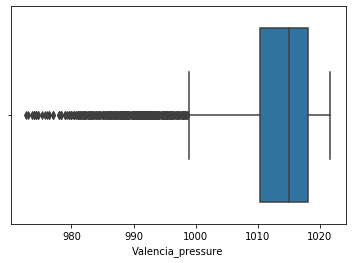

In [14]:
# we notice a large amount of missing values in the valencia pressure column... lets take a closer look
sns.boxplot(df_train['Valencia_pressure'])

# look at data statistics of this column

print('Mode')
print(df_train['Valencia_pressure'].mode())
print('Mean')
print(df_train['Valencia_pressure'].mean())
print('Median')
print(df_train['Valencia_pressure'].median())

In [15]:
#Impute missing values in Valencia_pressure with mode
mode = pd.concat([df_train.Valencia_pressure , df_test.Valencia_pressure]).mode()
df_train.Valencia_pressure.fillna(mode[0] , inplace=True)
df_test.Valencia_pressure.fillna(mode[0], inplace=True)

In [16]:
#Checking for any duplicated rows in the data
df_train.duplicated().sum() 
df_test.duplicated().sum() 

0

In [17]:
# looking at data statistics

df_train.describe()

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_weather_id,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,...,Seville_weather_id,Seville_wind_speed,Valencia_humidity,Valencia_pressure,Valencia_snow_3h,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_speed,load_shortfall_3h
count,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,1.377965e+03,0.128906,0.000439,289.855459,291.157644,288.447422,765.979687,190.544848,2.870497,43.469132,...,774.658818,2.425045,65.247727,1013.455228,0.000205,290.592152,291.337233,289.867648,2.586272,10673.857612
std,1.407314e+04,0.634730,0.003994,6.528111,7.273538,6.102593,88.142235,89.077337,1.792197,32.551044,...,71.940009,1.672895,19.262322,8.684485,0.011866,7.162274,7.565692,6.907402,2.411190,5218.046404
min,6.706667e+02,0.000000,0.000000,270.816667,272.150000,269.483333,200.666667,0.000000,0.000000,0.000000,...,200.000000,0.000000,10.333333,972.666667,0.000000,269.888000,269.888000,269.888000,0.000000,-6618.000000
25%,1.014000e+03,0.000000,0.000000,284.973443,285.483333,284.150000,800.000000,118.166667,1.666667,10.000000,...,800.000000,1.000000,51.333333,1012.666667,0.000000,285.150000,285.550167,284.783333,1.000000,7390.333333
50%,1.018000e+03,0.000000,0.000000,289.416667,290.150000,288.150000,800.333333,200.000000,2.666667,45.000000,...,800.000000,2.000000,67.000000,1017.000000,0.000000,290.176667,291.037000,289.550000,1.666667,11114.666667
75%,1.022000e+03,0.000000,0.000000,294.909000,296.855000,292.966667,801.000000,260.000000,4.000000,75.000000,...,800.000000,3.333333,81.333333,1018.000000,0.000000,296.056667,297.248333,294.820000,3.666667,14498.166667
max,1.001411e+06,12.000000,0.093000,307.316667,314.076667,304.816667,804.000000,360.000000,12.666667,100.000000,...,804.000000,11.666667,100.000000,1021.666667,0.791667,310.426667,314.263333,310.272000,52.000000,31904.000000


Here we attempt to confirm our assumption of normality amongst the residuals. If the residuals are non-normally distributed, confidence intervals can become too wide or too narrow, which leads to difficulty in estimating coefficients based on the minimisation of ordinary least squares.

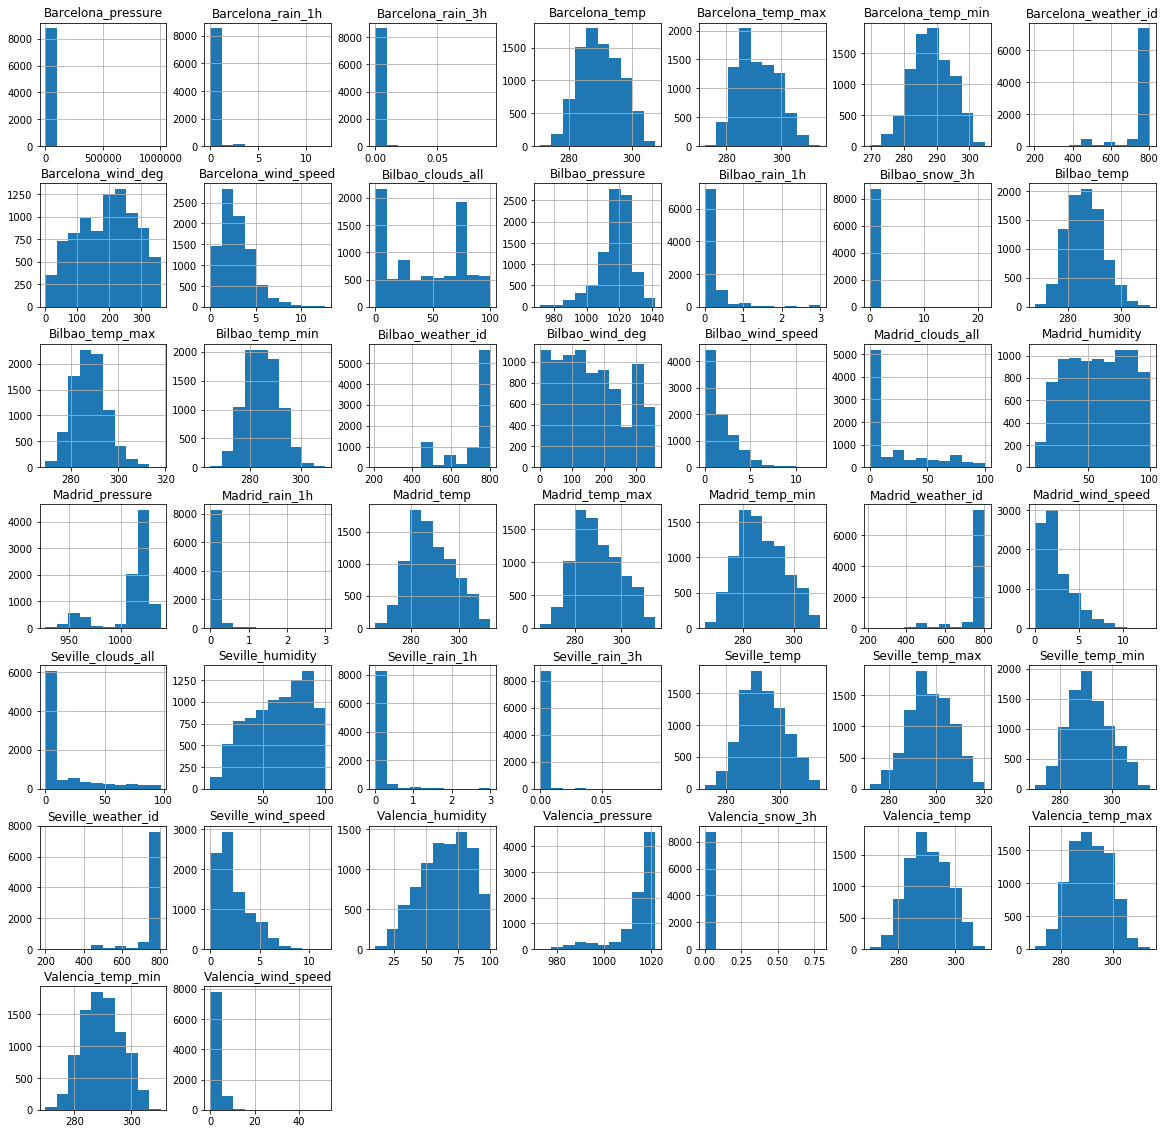

In [18]:
#Plotting all data features
features = ["Barcelona_pressure","Barcelona_rain_1h","Barcelona_rain_3h","Barcelona_temp","Barcelona_temp_max","Barcelona_temp_min","Barcelona_weather_id","Barcelona_wind_deg","Barcelona_wind_speed",
            "Bilbao_clouds_all","Bilbao_pressure","Bilbao_rain_1h","Bilbao_snow_3h","Bilbao_temp","Bilbao_temp_max","Bilbao_temp_min","Bilbao_weather_id","Bilbao_wind_deg","Bilbao_wind_speed",
            "Madrid_clouds_all","Madrid_humidity","Madrid_pressure","Madrid_rain_1h","Madrid_temp","Madrid_temp_max","Madrid_temp_min","Madrid_weather_id","Madrid_wind_speed",
            "Seville_clouds_all","Seville_humidity","Seville_rain_1h","Seville_rain_3h","Seville_temp","Seville_temp_max","Seville_temp_min","Seville_weather_id","Seville_wind_speed",
            "Valencia_humidity","Valencia_pressure","Valencia_snow_3h","Valencia_temp","Valencia_temp_max","Valencia_temp_min","Valencia_wind_speed"]
# create a list of all numerical features
df_train[features].hist(figsize=(20,20));

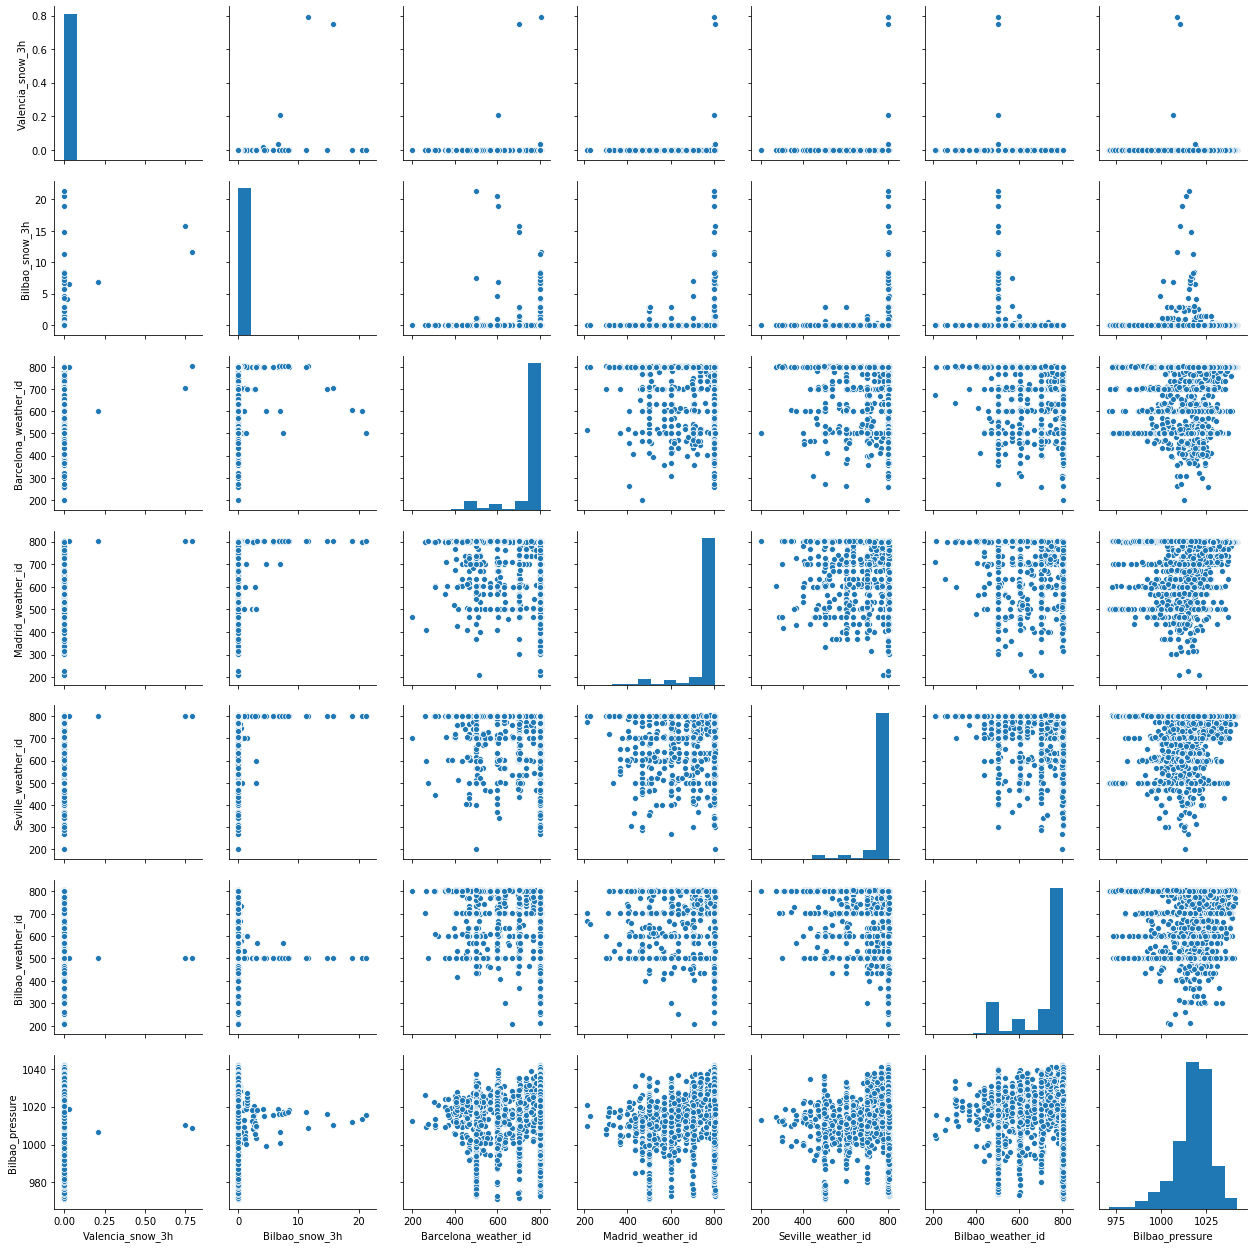

In [19]:
# plot relevant feature interactions

sns.pairplot(df_train[["Valencia_snow_3h",'Bilbao_snow_3h',
                      'Barcelona_weather_id','Madrid_weather_id','Seville_weather_id','Bilbao_weather_id',
                       "Bilbao_pressure"]])

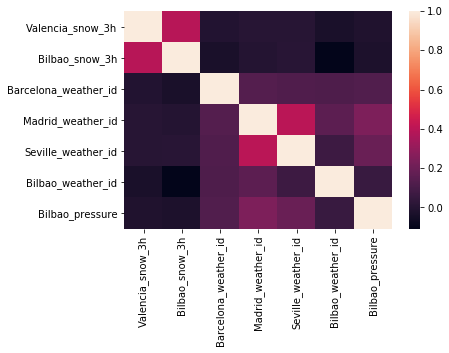

In [20]:
# evaluate correlation

sns.heatmap(df_train[["Valencia_snow_3h",'Bilbao_snow_3h',
                      'Barcelona_weather_id','Madrid_weather_id','Seville_weather_id','Bilbao_weather_id',
                       "Bilbao_pressure"]].corr())

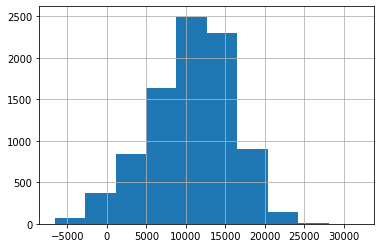

In [21]:
# looking at feature distributions

df_train.load_shortfall_3h.hist()

In [22]:
#some negative... doesnt make sense 
df_train['load_shortfall_3h'] = df_train['load_shortfall_3h'].clip(lower=0)

In [23]:
# data is now clean

clean_train = df_train
clean_test = df_test

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### We need to alter the data... AND we need to do this in such a way that it is replicable. 

#### Ideas for changes we will potentially be making:
* Drop features which are not needed
* Transform data - possibly through typecasting, and through extracting information 
* Encode - one-hot-encoding allows mathematical models to adequately process data

In [24]:
# Checking the data types:
df_train.dtypes

Barcelona_pressure      float64
Barcelona_rain_1h       float64
Barcelona_rain_3h       float64
Barcelona_temp          float64
Barcelona_temp_max      float64
Barcelona_temp_min      float64
Barcelona_weather_id    float64
Barcelona_wind_deg      float64
Barcelona_wind_speed    float64
Bilbao_clouds_all       float64
Bilbao_pressure         float64
Bilbao_rain_1h          float64
Bilbao_snow_3h          float64
Bilbao_temp             float64
Bilbao_temp_max         float64
Bilbao_temp_min         float64
Bilbao_weather_id       float64
Bilbao_wind_deg         float64
Bilbao_wind_speed       float64
Madrid_clouds_all       float64
Madrid_humidity         float64
Madrid_pressure         float64
Madrid_rain_1h          float64
Madrid_temp             float64
Madrid_temp_max         float64
Madrid_temp_min         float64
Madrid_weather_id       float64
Madrid_wind_speed       float64
Seville_clouds_all      float64
Seville_humidity        float64
Seville_pressure         object
Seville_

In [25]:
df_test.dtypes

Barcelona_pressure      float64
Barcelona_rain_1h       float64
Barcelona_rain_3h       float64
Barcelona_temp          float64
Barcelona_temp_max      float64
Barcelona_temp_min      float64
Barcelona_weather_id    float64
Barcelona_wind_deg      float64
Barcelona_wind_speed    float64
Bilbao_clouds_all       float64
Bilbao_pressure         float64
Bilbao_rain_1h          float64
Bilbao_snow_3h            int64
Bilbao_temp             float64
Bilbao_temp_max         float64
Bilbao_temp_min         float64
Bilbao_weather_id       float64
Bilbao_wind_deg         float64
Bilbao_wind_speed       float64
Madrid_clouds_all       float64
Madrid_humidity         float64
Madrid_pressure         float64
Madrid_rain_1h          float64
Madrid_temp             float64
Madrid_temp_max         float64
Madrid_temp_min         float64
Madrid_weather_id       float64
Madrid_wind_speed       float64
Seville_clouds_all      float64
Seville_humidity        float64
Seville_pressure         object
Seville_

In [26]:
# Changing time to the correct format

clean_train['time'] = pd.to_datetime(clean_train['time'])
clean_test['time'] = pd.to_datetime(clean_test['time'])

#Making data types consistant so we dont bump into any issues during analysis
clean_test['Bilbao_snow_3h'] = clean_test['Bilbao_snow_3h'].astype(float)
clean_test['Valencia_snow_3h'] = clean_test['Valencia_snow_3h'].astype(float)

# create new features
clean_train['Valencia_wind_deg'] = clean_train['Valencia_wind_deg'].apply(str)
clean_train['Valencia_wind_deg'] = clean_train['Valencia_wind_deg'].str.extract('(\d+)')
clean_train['Valencia_wind_deg'] = pd.to_numeric(clean_train['Valencia_wind_deg'])

clean_train['Seville_pressure'] = clean_train['Seville_pressure'].apply(str)
clean_train['Seville_pressure'] =clean_train['Seville_pressure'].str.extract('(\d+)')
clean_train['Seville_pressure'] = pd.to_numeric(clean_train['Seville_pressure'])

In [27]:
clean_train['time'].head()

0   2015-01-01 03:00:00
1   2015-01-01 06:00:00
2   2015-01-01 09:00:00
3   2015-01-01 12:00:00
4   2015-01-01 15:00:00
Name: time, dtype: datetime64[ns]

In [28]:
# engineer features, getting the start hour

def hr_func(ts):
    return str(ts.hour)

clean_train['time_hour'] = clean_train['time'].apply(hr_func)

In [29]:
# remove missing values/ features that have no correlation or highly correlated

clean_train = clean_train.drop(["Valencia_snow_3h",'Bilbao_snow_3h',
                      'Barcelona_weather_id','Madrid_weather_id','Seville_weather_id','Bilbao_weather_id',
                       "Bilbao_pressure","Valencia_pressure",
                                'time'], axis = 1)
clean_train.head()

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_rain_1h,...,Seville_temp_min,Seville_wind_speed,Valencia_humidity,Valencia_temp,Valencia_temp_max,Valencia_temp_min,Valencia_wind_deg,Valencia_wind_speed,load_shortfall_3h,time_hour
0,1036.333333,0.0,0.0,281.013000,281.013000,281.013000,42.666667,6.333333,0.0,0.0,...,274.254667,3.333333,75.666667,269.888000,269.888000,269.888000,5,0.666667,6715.666667,3
1,1037.333333,0.0,0.0,280.561667,280.561667,280.561667,139.000000,4.000000,0.0,0.0,...,274.945000,3.333333,71.000000,271.728333,271.728333,271.728333,10,1.666667,4171.666667,6
2,1038.000000,0.0,0.0,281.583667,281.583667,281.583667,326.000000,2.000000,0.0,0.0,...,278.792000,2.666667,65.666667,278.008667,278.008667,278.008667,9,1.000000,4274.666667,9
3,1037.000000,0.0,0.0,283.434104,283.434104,283.434104,273.000000,2.333333,0.0,0.0,...,285.394000,4.000000,54.000000,284.899552,284.899552,284.899552,8,1.000000,5075.666667,12
4,1035.000000,0.0,0.0,284.213167,284.213167,284.213167,260.000000,4.333333,2.0,0.0,...,285.513719,3.000000,58.333333,283.015115,283.015115,283.015115,7,1.000000,6620.666667,15


In [30]:
# get dummy variables 

clean_train=pd.get_dummies(clean_train, drop_first=True)

In [31]:
clean_train.shape

(8763, 46)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Get data ready to be modelled (test-train split if required.... in this case, recall the 'validation' set concept we introduced earlier). 

- test-train split
- instantiate model
- fit onto train data
- predict on test model 
- evaluate performance


In [32]:
# create targets and features dataset

y = clean_train[['load_shortfall_3h']]
clean_train = clean_train.drop('load_shortfall_3h',axis=1)
x=clean_train
clean_train.shape

(8763, 45)

In [33]:
# split data
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.33)

We are going to test different Machine Models:
- **Linear Regression**: A linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables);
- **Decision Tree**: Decision Trees are tree-like (upside down) machine learning models which represent data by partitioning it into different sections based on questions asked of predictive variables in the data. The model uses the Mean Square Error (mse) by default;
- **Random Forest**: A random forest is a powerful non-parametric algorithm and as mentioned is an example of an ensemble method built on decision trees, meaning that it relies on aggregating the results of an ensemble of decision trees. The ensembled trees are randomized and the output is mean prediction of the individual trees

In [34]:
# create one or more ML models
lr_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=PARAMETER_CONSTANT,max_depth=4, min_impurity_decrease=0.02 )
RF_model = RandomForestRegressor(n_estimators=100,random_state=0, max_depth=4, n_jobs=1)

In [35]:
# fit onto train data

fitted = lr_model.fit(x_train,y_train)
tree_model.fit(x_train,y_train)
RF_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [36]:
x_train.shape

(5871, 45)

In [37]:
# predict

lr_preds = lr_model.predict(x_test)
tree_preds = tree_model.predict(x_test)
RF_preds = RF_model.predict(x_test)

In [38]:
lr_preds

array([[12403.94726392],
       [11699.19504152],
       [11976.25273578],
       ...,
       [12919.13152434],
       [ 8207.93305046],
       [12732.05217548]])

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section we look to evaluate, and compare the performance of various different models. We will use the RMSE (root mean squared error) in order to compare the performance. 

In [39]:
# calculate MSE
RMSE_lr = mean_squared_error(y_test,lr_preds)
RMSE_tree = mean_squared_error(y_test,tree_preds)
RMSE_RF = mean_squared_error(y_test,RF_preds)
# Report RMSE
print("Linear Regression Model RMSE is:",np.sqrt(RMSE_lr))
print("Regression Decision Tree model RMSE is:",np.sqrt(RMSE_tree))
print("Random Forest Model RMSE is:",np.sqrt(RMSE_RF))

Linear Regression Model RMSE is: 4280.089856590365
Regression Decision Tree model RMSE is: 4581.67546596028
Random Forest Model RMSE is: 4485.534912795519


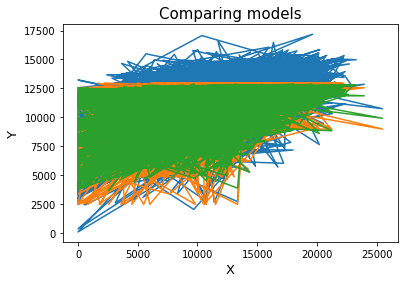

In [42]:
plt.plot(y_test,lr_preds)
plt.plot(y_test,tree_preds)
plt.plot(y_test,RF_preds)

plt.title("Comparing models",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
plt.show()

In [56]:
#Reporting R-Squared
print('Linear Regression Model R_squared is:', metrics.r2_score(y_test,lr_preds))
print('Regression Decision Tree model R_squared is:', metrics.r2_score(y_test,tree_preds))
print('Random Forest Model Model R_squared is:', metrics.r2_score(y_test,RF_preds))

Linear Regression Model R_squared is: 0.2928703179483092
Regression Decision Tree model R_squared is: 0.18970727273350796
Random Forest Model Model R_squared is: 0.2233563843611288


The lower the RMSE, the better a given model is able to “fit” a dataset. Therefore the Linear Regression model shows the best fit soley based on its RMSE. The higher the R-Sqare the better, again Linear Regression model shows the best fit. However, the Linear Regression model isnt performing all that well in its predictions it is still a poor model.

### Make submission to kaggle!

- Repeat the preprocessing and cleaning process from Train data
- Take saved model - and make predictions onto the Test file 
- Export as CSV... in the 'sample_submission' format

In [44]:
clean_test.head()
clean_test.columns

Index(['Barcelona_pressure', 'Barcelona_rain_1h', 'Barcelona_rain_3h',
       'Barcelona_temp', 'Barcelona_temp_max', 'Barcelona_temp_min',
       'Barcelona_weather_id', 'Barcelona_wind_deg', 'Barcelona_wind_speed',
       'Bilbao_clouds_all', 'Bilbao_pressure', 'Bilbao_rain_1h',
       'Bilbao_snow_3h', 'Bilbao_temp', 'Bilbao_temp_max', 'Bilbao_temp_min',
       'Bilbao_weather_id', 'Bilbao_wind_deg', 'Bilbao_wind_speed',
       'Madrid_clouds_all', 'Madrid_humidity', 'Madrid_pressure',
       'Madrid_rain_1h', 'Madrid_temp', 'Madrid_temp_max', 'Madrid_temp_min',
       'Madrid_weather_id', 'Madrid_wind_speed', 'Seville_clouds_all',
       'Seville_humidity', 'Seville_pressure', 'Seville_rain_1h',
       'Seville_rain_3h', 'Seville_temp', 'Seville_temp_max',
       'Seville_temp_min', 'Seville_weather_id', 'Seville_wind_speed',
       'Valencia_humidity', 'Valencia_pressure', 'Valencia_snow_3h',
       'Valencia_temp', 'Valencia_temp_max', 'Valencia_temp_min',
       'Valencia_wind_d

In [45]:
output = pd.DataFrame({"time":df_test['time']})
df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(mode[0] , inplace=True)
df_test['time'] = pd.to_datetime(df_test['time'])

df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].apply(str)
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg'] = pd.to_numeric(df_test['Valencia_wind_deg'])

df_test['Seville_pressure'] = df_test['Seville_pressure'].apply(str)
df_test['Seville_pressure'] = df_test['Seville_pressure'].str.extract('(\d+)')
df_test['Seville_pressure'] = df_test['Seville_pressure'].astype(float)

df_test['time_hour'] = df_test['time'].apply(hr_func)
df_test = df_test.drop(['time'], axis = 1)

In [46]:
output = pd.DataFrame({"time":clean_test['time']})
clean_test['Valencia_pressure'] = clean_test['Valencia_pressure'].fillna(mode[0] , inplace=True)
clean_test['time'] = pd.to_datetime(clean_test['time'])

clean_test['Valencia_wind_deg'] = clean_test['Valencia_wind_deg'].apply(str)
clean_test['Valencia_wind_deg'] = clean_test['Valencia_wind_deg'].str.extract('(\d+)')
clean_test['Valencia_wind_deg'] = pd.to_numeric(clean_test['Valencia_wind_deg'])

clean_test['Seville_pressure'] = clean_test['Seville_pressure'].apply(str)
clean_test['Seville_pressure'] = clean_test['Seville_pressure'].str.extract('(\d+)')
clean_test['Seville_pressure'] = pd.to_numeric(clean_test['Seville_pressure'])

clean_test['time_hour'] = clean_test['time'].apply(hr_func)
clean_test = clean_test.drop(columns = ["Valencia_snow_3h",'Bilbao_snow_3h',
                      'Barcelona_weather_id','Madrid_weather_id','Seville_weather_id','Bilbao_weather_id',
                       "Bilbao_pressure","time"], axis = 1)

clean_test.columns

Index(['Barcelona_pressure', 'Barcelona_rain_1h', 'Barcelona_rain_3h',
       'Barcelona_temp', 'Barcelona_temp_max', 'Barcelona_temp_min',
       'Barcelona_wind_deg', 'Barcelona_wind_speed', 'Bilbao_clouds_all',
       'Bilbao_rain_1h', 'Bilbao_temp', 'Bilbao_temp_max', 'Bilbao_temp_min',
       'Bilbao_wind_deg', 'Bilbao_wind_speed', 'Madrid_clouds_all',
       'Madrid_humidity', 'Madrid_pressure', 'Madrid_rain_1h', 'Madrid_temp',
       'Madrid_temp_max', 'Madrid_temp_min', 'Madrid_wind_speed',
       'Seville_clouds_all', 'Seville_humidity', 'Seville_pressure',
       'Seville_rain_1h', 'Seville_rain_3h', 'Seville_temp',
       'Seville_temp_max', 'Seville_temp_min', 'Seville_wind_speed',
       'Valencia_humidity', 'Valencia_pressure', 'Valencia_temp',
       'Valencia_temp_max', 'Valencia_temp_min', 'Valencia_wind_deg',
       'Valencia_wind_speed', 'time_hour'],
      dtype='object')

In [47]:
clean_test.columns

Index(['Barcelona_pressure', 'Barcelona_rain_1h', 'Barcelona_rain_3h',
       'Barcelona_temp', 'Barcelona_temp_max', 'Barcelona_temp_min',
       'Barcelona_wind_deg', 'Barcelona_wind_speed', 'Bilbao_clouds_all',
       'Bilbao_rain_1h', 'Bilbao_temp', 'Bilbao_temp_max', 'Bilbao_temp_min',
       'Bilbao_wind_deg', 'Bilbao_wind_speed', 'Madrid_clouds_all',
       'Madrid_humidity', 'Madrid_pressure', 'Madrid_rain_1h', 'Madrid_temp',
       'Madrid_temp_max', 'Madrid_temp_min', 'Madrid_wind_speed',
       'Seville_clouds_all', 'Seville_humidity', 'Seville_pressure',
       'Seville_rain_1h', 'Seville_rain_3h', 'Seville_temp',
       'Seville_temp_max', 'Seville_temp_min', 'Seville_wind_speed',
       'Valencia_humidity', 'Valencia_pressure', 'Valencia_temp',
       'Valencia_temp_max', 'Valencia_temp_min', 'Valencia_wind_deg',
       'Valencia_wind_speed', 'time_hour'],
      dtype='object')

In [48]:
clean_test=pd.get_dummies(clean_test, drop_first=True)
clean_test.head()

,Barcelona_pressure,Barcelona_rain_1h,Barcelona_rain_3h,Barcelona_temp,Barcelona_temp_max,Barcelona_temp_min,Barcelona_wind_deg,Barcelona_wind_speed,Bilbao_clouds_all,Bilbao_rain_1h,...,Valencia_temp_min,Valencia_wind_deg,Valencia_wind_speed,time_hour_12,time_hour_15,time_hour_18,time_hour_21,time_hour_3,time_hour_6,time_hour_9
0,1017.333333,0.0,0.0,287.356667,287.816667,286.816667,176.666667,4.000000,20.000000,0.0,...,287.483333,8,5.000000,0,0,0,0,0,0,0
1,1020.333333,0.0,0.0,284.190000,284.816667,283.483333,266.666667,4.666667,0.000000,0.0,...,284.150000,8,5.333333,0,0,0,0,1,0,0
2,1023.000000,0.0,0.0,283.150000,284.483333,281.816667,263.333333,4.000000,0.000000,0.0,...,282.816667,7,5.000000,0,0,0,0,0,1,0
3,1025.666667,0.0,0.0,283.190000,284.150000,282.150000,86.666667,2.333333,26.666667,0.0,...,283.483333,7,5.333333,0,0,0,0,0,0,1
4,1026.000000,0.0,0.0,286.816667,287.483333,286.150000,283.333333,4.666667,26.666667,0.0,...,287.150000,7,8.666667,1,0,0,0,0,0,0


In [49]:
test_pred=lr_model.predict(clean_test)

In [50]:
test_pred

array([[11467.90310544],
       [ 7257.82971569],
       [ 6436.6133162 ],
       ...,
       [12878.3834181 ],
       [12783.87908972],
       [13452.98748673]])

In [51]:
df_sample.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,0
1,2018-01-01 03:00:00,1
2,2018-01-01 06:00:00,2
3,2018-01-01 09:00:00,3
4,2018-01-01 12:00:00,4


In [52]:
output['load_shortfall_3h']=test_pred   
output.head()

,time,load_shortfall_3h
0,2018-01-01 00:00:00,11467.903105
1,2018-01-01 03:00:00,7257.829716
2,2018-01-01 06:00:00,6436.613316
3,2018-01-01 09:00:00,10020.731477
4,2018-01-01 12:00:00,11563.176070


In [53]:
output.to_csv("submission_electricityshortfall.csv",index=False)

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Discuss how the best performing model works in a for all stakeholder. Both technical and non-technical stakeholders need to be able to grasp the intuition behind the model's inner workings. 


The model is not predicting well enough with a very low RSME value. Meaning that the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain is not well modelled as a function of various city-specific weather features. Sceintifically there is a relationship between pressure and temperature to the generation of wind which is the main source of renuewable energy. However, when removing uncorrelated features like weather_id and snow there still seems to be perhaps other combination of features that can produce a better result. Therefore, the model needs to be refined and more predictive features has to be included. Possibly a single or multiple factor analysis can be used to achieve this and more tests for mulicolinearity. Although, cross validation may help in training the model better, the use of too many non-predictive features are where the problem may lie.

